In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [3]:
# load image path
import cv2 as cv
from keras.utils.image_utils import load_img,img_to_array
img_folder = Path("data")

label = ["bread","egg","meat",'noodle',"rice"]
test_image = list([])
X_data = np.empty((0,32,32))
Y_label = []

for i in range(len(label)):
    train_folder = img_folder/label[i]
    test = list(train_folder.glob("*.jpeg"))
    test_image = test_image + test
    Y_label = Y_label+[i]*len(list(train_folder.glob("*.jpeg")))

for  i in range(len(test_image)):
    image_path = str(test_image[i])
    img = load_img(image_path,target_size=(32,32),color_mode = "grayscale")
    img= img_to_array(img)
    img = img.astype("float32")/255
    

    img = np.reshape(img,(1,32,32))
    X_data = np.vstack((X_data,img))
print(X_data.dtype)

float64


In [4]:
print(X_data.shape)

(104, 32, 32)


In [5]:
from keras.models import Sequential,Model
from keras.layers import Dense,Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(32,kernel_size = (3,3),activation = "relu", input_shape = (32,32,1),padding = "same"))
model.add(MaxPooling2D((2,2),padding="same"))
model.add(Conv2D(64,kernel_size=(3,3),activation="relu",padding="same"))
model.add(MaxPooling2D((2,2),padding = "same"))
model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(5,activation="softmax"))

2022-11-15 10:59:59.255562: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/tan/Carla_envi/Car_enviroment/lib/python3.8/site-packages/cv2/../../lib64:
2022-11-15 10:59:59.255828: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-11-15 10:59:59.255867: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (dauphongtantan): /proc/driver/nvidia/version does not exist
2022-11-15 10:59:59.256627: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 4096)              0         
                                                                 
 dense (Dense)               (None, 128)               5

In [7]:
from keras.optimizers import Adam
model.compile(loss='categorical_crossentropy',optimizer = Adam(),metrics= ['accuracy'])

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X_data,Y_label,test_size=0.3,shuffle=True)

In [9]:
from keras.utils import to_categorical
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

In [10]:
from keras.callbacks import EarlyStopping
earlyStop = EarlyStopping(monitor='loss', patience=3)

In [11]:
history = model.fit(X_train, Y_train, epochs = 100, batch_size = 32, validation_data=[X_test,Y_test],callbacks = [earlyStop])

Epoch 1/100
3/3 [==============================] - 1s 81ms/step - loss: 1.6838 - accuracy: 0.2222 - val_loss: 1.8091 - val_accuracy: 0.0312
Epoch 2/100
3/3 [==============================] - 0s 20ms/step - loss: 1.5778 - accuracy: 0.3472 - val_loss: 1.7058 - val_accuracy: 0.2812
Epoch 3/100
3/3 [==============================] - 0s 22ms/step - loss: 1.5637 - accuracy: 0.5000 - val_loss: 1.6676 - val_accuracy: 0.2500
Epoch 4/100
3/3 [==============================] - 0s 20ms/step - loss: 1.5470 - accuracy: 0.4306 - val_loss: 1.6649 - val_accuracy: 0.0312
Epoch 5/100
3/3 [==============================] - 0s 21ms/step - loss: 1.5208 - accuracy: 0.3056 - val_loss: 1.7111 - val_accuracy: 0.0312
Epoch 6/100
3/3 [==============================] - 0s 22ms/step - loss: 1.4801 - accuracy: 0.3333 - val_loss: 1.7939 - val_accuracy: 0.0625
Epoch 7/100
3/3 [==============================] - 0s 20ms/step - loss: 1.4528 - accuracy: 0.3611 - val_loss: 1.7806 - val_accuracy: 0.0312
Epoch 8/100
3/3 [===

In [12]:
from keras.utils.image_utils import load_img
image = load_img('img/egg.jpg', target_size=(32,32),color_mode="grayscale")

1/1 [==============================] - 0s 57ms/step
egg


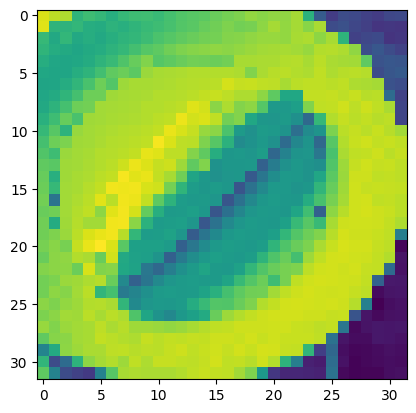

In [13]:
from keras.utils.image_utils import img_to_array
img = img_to_array(image)
img = img.reshape(1,32,32)
img = img.astype('float32')
img = img/255
tag = np.argmax(model.predict(img),axis=1)
plt.imshow(image)
print(label[tag[0]])

1/1 [==============================] - 0s 14ms/step
meat


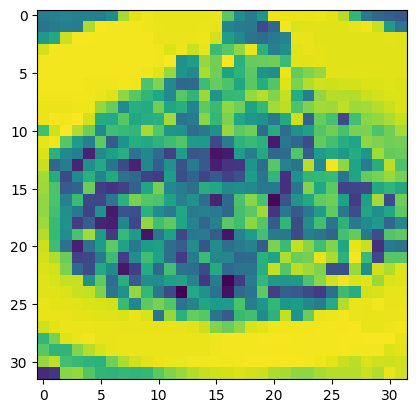

In [16]:
from keras.utils.image_utils import load_img
image = load_img('img/spagetti.jpeg', target_size=(32,32),color_mode="grayscale")
from keras.utils.image_utils import img_to_array
img = img_to_array(image)
img = img.reshape(1,32,32)
img = img.astype('float32')
img = img/255
tag = np.argmax(model.predict(img),axis=1)
plt.imshow(image)
print(label[tag[0]])